# Bonstons

## Imports di base

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("C:/Users/giann/Documents/GitHub/Bostonshouse/boston.csv")

## Presa di conoscenza del dataset

In [21]:
# Visualizza le prime 5 righe del dataset
display(df.head())

# Visualizza le ultime 5 righe del dataset
display(df.tail())

# Informazioni generali sulle colonne e tipi di dati
df.info()

# Statistiche descrittive sulle colonne numeriche
display(df.describe())

# Visualizza la dimensione del dataset (righe, colonne)
print("Shape:", df.shape)

# Visualizza il numero di valori nulli per colonna
print("Missing values per column:\n", df.isnull().sum())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Shape: (506, 14)
Missing values per column:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### Ricerca delle features più adeguate

Colonna 'CRIM': 1 correlazioni forti
RAD    0.625505
Name: CRIM, dtype: float64
----------------------------------------
Colonna 'ZN': 1 correlazioni forti
DIS    0.664408
Name: ZN, dtype: float64
----------------------------------------
Colonna 'INDUS': 5 correlazioni forti
NOX      0.763651
TAX      0.720760
AGE      0.644779
LSTAT    0.603800
DIS     -0.708027
Name: INDUS, dtype: float64
----------------------------------------
Colonna 'CHAS': 0 correlazioni forti
Colonna 'NOX': 5 correlazioni forti
INDUS    0.763651
AGE      0.731470
TAX      0.668023
RAD      0.611441
DIS     -0.769230
Name: NOX, dtype: float64
----------------------------------------
Colonna 'RM': 2 correlazioni forti
MEDV     0.695360
LSTAT   -0.613808
Name: RM, dtype: float64
----------------------------------------
Colonna 'AGE': 4 correlazioni forti
NOX      0.731470
INDUS    0.644779
LSTAT    0.602339
DIS     -0.747881
Name: AGE, dtype: float64
----------------------------------------
Colonna 'DIS': 4 correl

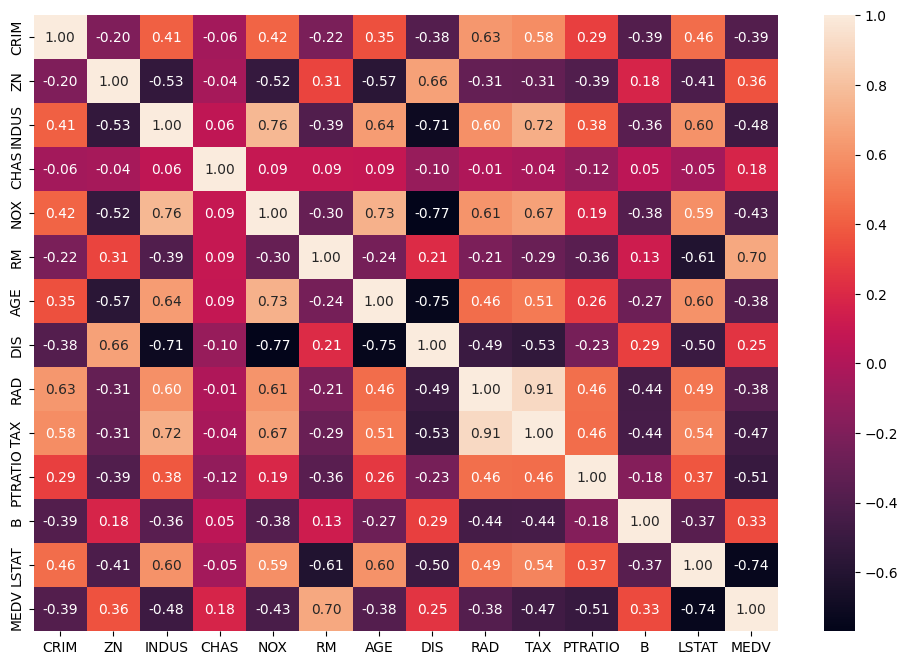

In [22]:
corr = df.corr()
# Stampa tutte le correlazioni con valore alto per ogni colonna
for col in corr.columns:
    high_corr = corr[col][(corr[col].abs() > 0.6) & (corr[col].abs() < 1)]
    high_corr = high_corr.reindex(high_corr.sort_values(ascending=False).index)
    print(f"Colonna '{col}': {len(high_corr)} correlazioni forti")
    if not high_corr.empty:
        print(high_corr)
        print("-" * 40)

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

Con i dati qui sopra scegliamo le features RM e LSTAT. Sono quelle con le correlazioni più alte.

In [23]:
X = df[['RM', 'LSTAT']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Verifica della non linearità tramite scatter plot con curve di regressione

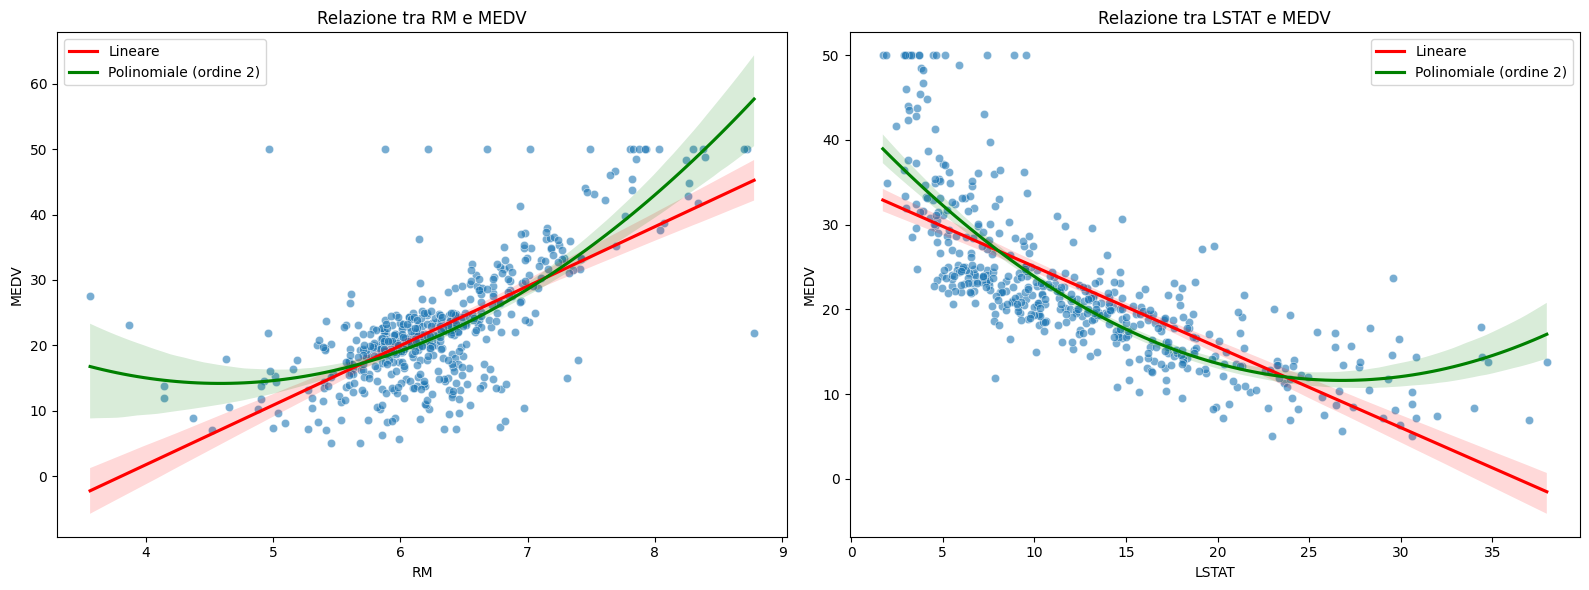

,Feature,RMSE Lineare,RMSE Polinomiale (Grado 2),Miglioramento %
0,RM,6.603071,6.174278,6.493849
1,LSTAT,6.203464,5.507315,11.221939


C:\Users\giann\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\giann\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


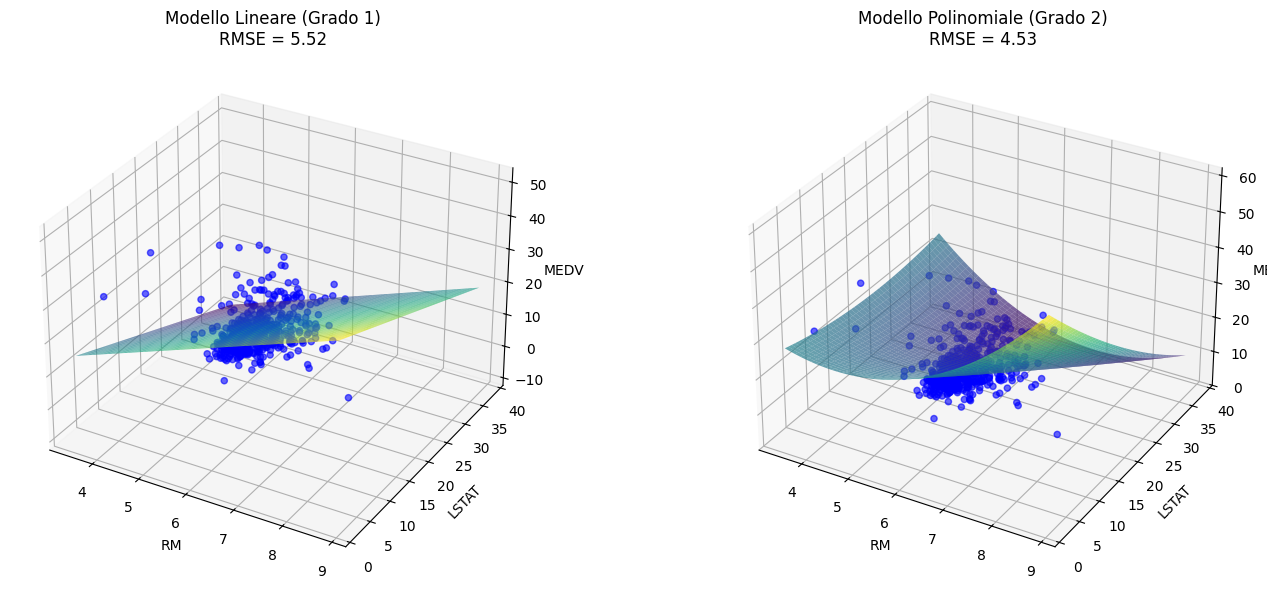

RMSE modello lineare: 5.5238
RMSE modello polinomiale grado 2: 4.5268
Miglioramento % passando da grado 1 a grado 2: 18.05%


In [24]:
plt.figure(figsize=(16, 6))

# Grafico per RM e MEDV
plt.subplot(1, 2, 1)
sns.scatterplot(x='RM', y='MEDV', data=df, alpha=0.6)
sns.regplot(x='RM', y='MEDV', data=df, scatter=False, color='red', label='Lineare')
sns.regplot(x='RM', y='MEDV', data=df, scatter=False, color='green', 
            order=2, label='Polinomiale (ordine 2)')
plt.title('Relazione tra RM e MEDV')
plt.legend()

# Grafico per LSTAT e MEDV
plt.subplot(1, 2, 2)
sns.scatterplot(x='LSTAT', y='MEDV', data=df, alpha=0.6)
sns.regplot(x='LSTAT', y='MEDV', data=df, scatter=False, color='red', label='Lineare')
sns.regplot(x='LSTAT', y='MEDV', data=df, scatter=False, color='green', 
            order=2, label='Polinomiale (ordine 2)')
plt.title('Relazione tra LSTAT e MEDV')
plt.legend()

plt.tight_layout()
plt.show()

# Test della non linearità tramite confronto di modelli
features = ['RM', 'LSTAT']
results_nl = []

for feature in features:
    # Modello lineare
    X_single = df[[feature]]
    y_single = df['MEDV']
    
    # Calcola RMSE per modello lineare
    model_linear = LinearRegression()
    model_linear.fit(X_single, y_single)
    y_pred_linear = model_linear.predict(X_single)
    rmse_linear = np.sqrt(mean_squared_error(y_single, y_pred_linear))
    
    # Modello polinomiale di ordine 2
    poly2 = PolynomialFeatures(degree=2)
    X_poly2 = poly2.fit_transform(X_single)
    
    model_poly2 = LinearRegression()
    model_poly2.fit(X_poly2, y_single)
    y_pred_poly2 = model_poly2.predict(X_poly2)
    rmse_poly2 = np.sqrt(mean_squared_error(y_single, y_pred_poly2))
    
    results_nl.append({
        'Feature': feature,
        'RMSE Lineare': rmse_linear,
        'RMSE Polinomiale (Grado 2)': rmse_poly2,
        'Miglioramento %': (rmse_linear - rmse_poly2) / rmse_linear * 100
    })

results_nl_df = pd.DataFrame(results_nl)
display(results_nl_df)

# Visualizzazione 3D per vedere la relazione congiunta
X = df[['RM', 'LSTAT']]
y = df['MEDV']

# Crea modelli di diverso grado
poly1 = make_pipeline(PolynomialFeatures(1), LinearRegression())
poly2 = make_pipeline(PolynomialFeatures(2), LinearRegression())

poly1.fit(X, y)
poly2.fit(X, y)

# Crea una griglia per la visualizzazione
x_min, x_max = X['RM'].min() - 0.1, X['RM'].max() + 0.1
y_min, y_max = X['LSTAT'].min() - 0.1, X['LSTAT'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predici i valori per la superficie
Z1 = poly1.predict(grid_points).reshape(xx.shape)
Z2 = poly2.predict(grid_points).reshape(xx.shape)

# Visualizzazione RMSE dei modelli
rmse_poly1 = np.sqrt(mean_squared_error(y, poly1.predict(X)))
rmse_poly2 = np.sqrt(mean_squared_error(y, poly2.predict(X)))

fig = plt.figure(figsize=(15, 6))

# Superficie lineare
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X['RM'], X['LSTAT'], y, c='blue', marker='o', alpha=0.6)
surf1 = ax1.plot_surface(xx, yy, Z1, cmap=plt.cm.viridis, alpha=0.7)
ax1.set_xlabel('RM')
ax1.set_ylabel('LSTAT')
ax1.set_zlabel('MEDV')
ax1.set_title(f'Modello Lineare (Grado 1)\nRMSE = {rmse_poly1:.2f}')

# Superficie polinomiale grado 2
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X['RM'], X['LSTAT'], y, c='blue', marker='o', alpha=0.6)
surf2 = ax2.plot_surface(xx, yy, Z2, cmap=plt.cm.viridis, alpha=0.7)
ax2.set_xlabel('RM')
ax2.set_ylabel('LSTAT')
ax2.set_zlabel('MEDV')
ax2.set_title(f'Modello Polinomiale (Grado 2)\nRMSE = {rmse_poly2:.2f}')

plt.tight_layout()
plt.show()

# Stampa il miglioramento percentuale
miglioramento = (rmse_poly1 - rmse_poly2) / rmse_poly1 * 100

print(f"RMSE modello lineare: {rmse_poly1:.4f}")
print(f"RMSE modello polinomiale grado 2: {rmse_poly2:.4f}")
print(f"Miglioramento % passando da grado 1 a grado 2: {miglioramento:.2f}%")

## Regressione non lineare

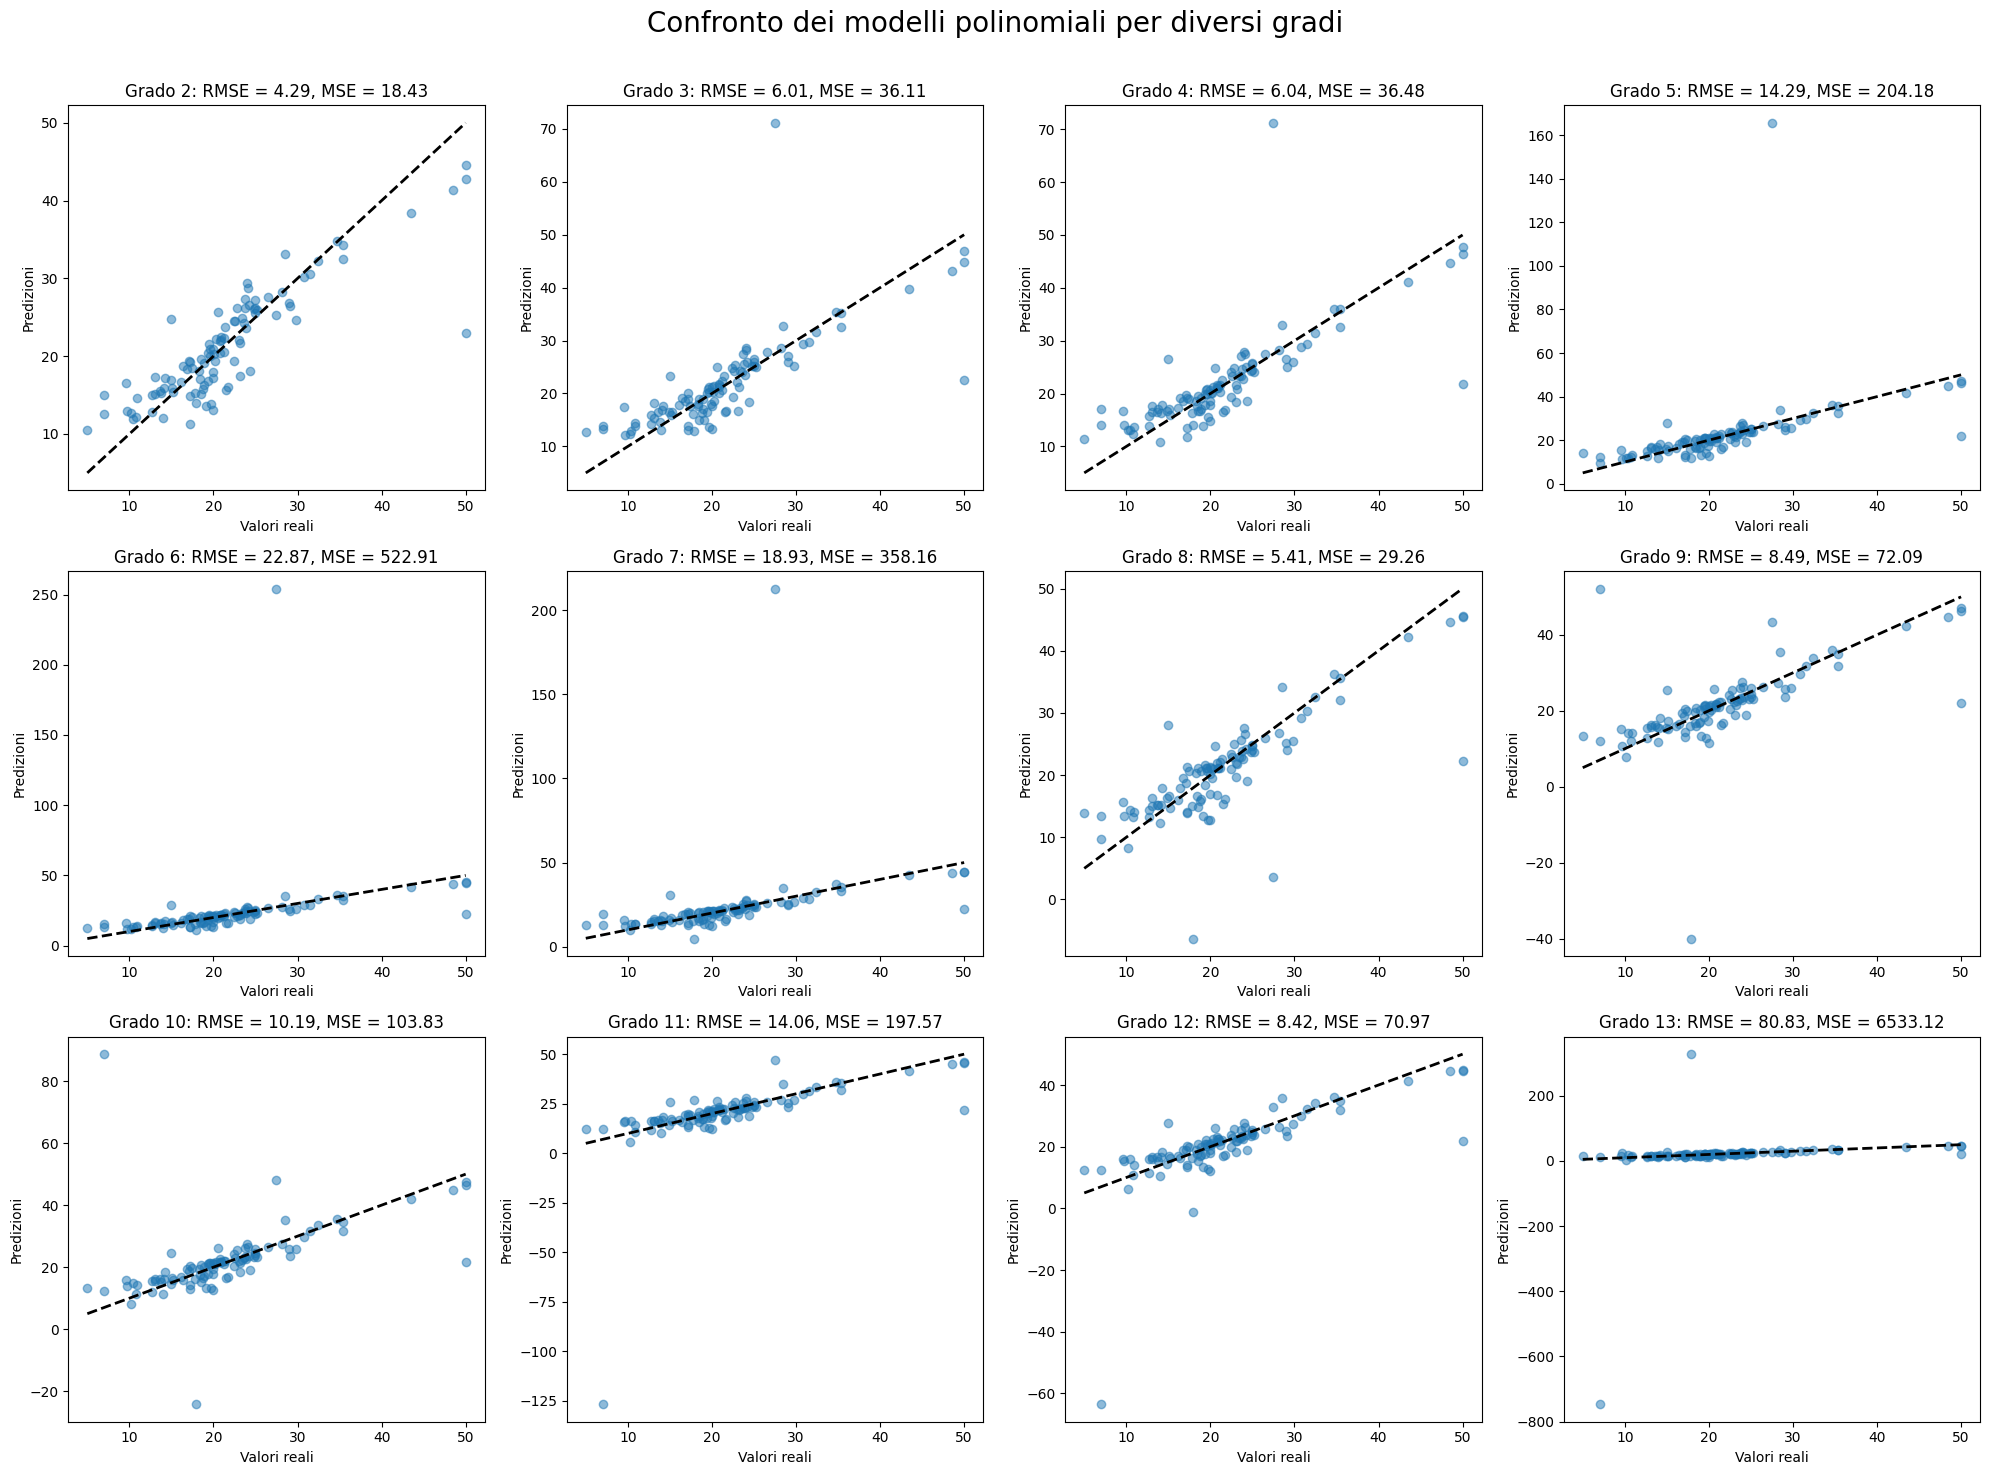

In [ ]:
degrees = range(2, 14)
results = []
predictions = []

plt.figure(figsize=(20, 15))
for i, degree in enumerate(degrees):
    # Creazione e addestramento del modello
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    # NON SCALATI
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    # Salva le predizioni e i risultati per dopo
    predictions.append(y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    results.append({'Grado': degree, 'mse': mse, 'rmse': rmse, 'mae': mae})
    
    # Crea un subplot per ogni grado
    plt.subplot(3, 4, i+1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Valori reali')
    plt.ylabel('Predizioni')
    plt.title(f'Grado {degree}: RMSE = {rmse:.2f}, MSE = {mse:.2f}')
    

plt.suptitle('Confronto dei modelli polinomiali per diversi gradi', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

#### Tabella del confronto dei risultati

,Grado,mse,rmse,mae
0,2,18.433778,4.293458,2.883347
1,3,36.114983,6.009574,3.175291
2,4,36.483673,6.040172,3.092192
3,5,204.180231,14.289165,3.893161
4,6,522.912625,22.867283,4.961402
5,7,358.163113,18.925198,4.685085
6,8,29.260338,5.409283,3.143794
7,9,72.090841,8.490633,3.683711
8,10,103.825327,10.189471,3.988781
9,11,197.574350,14.056114,4.307661


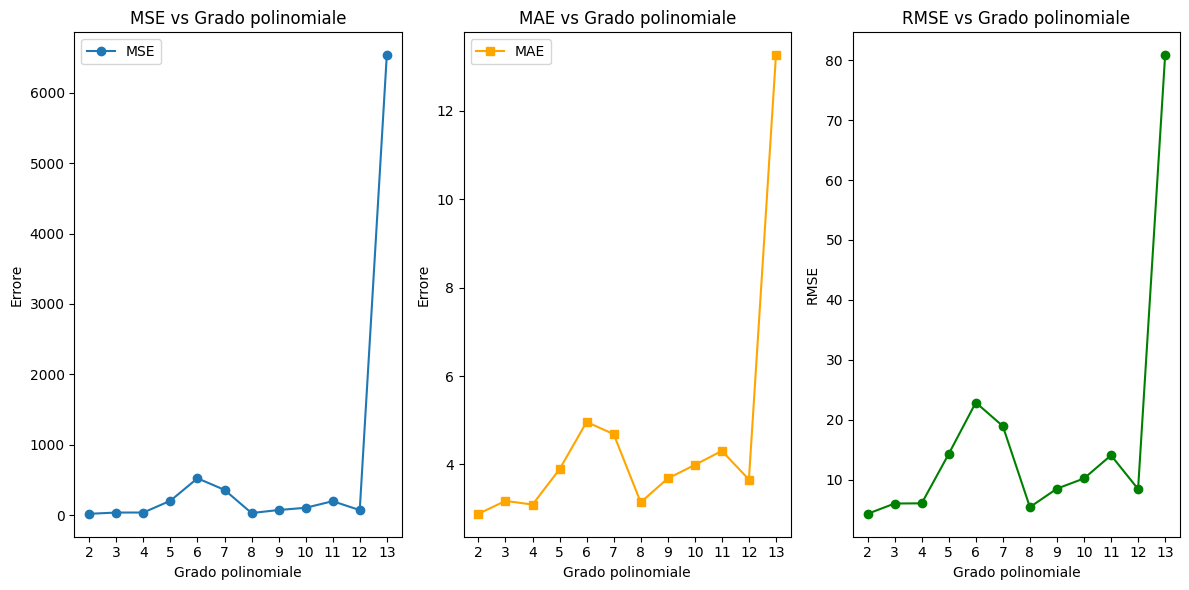

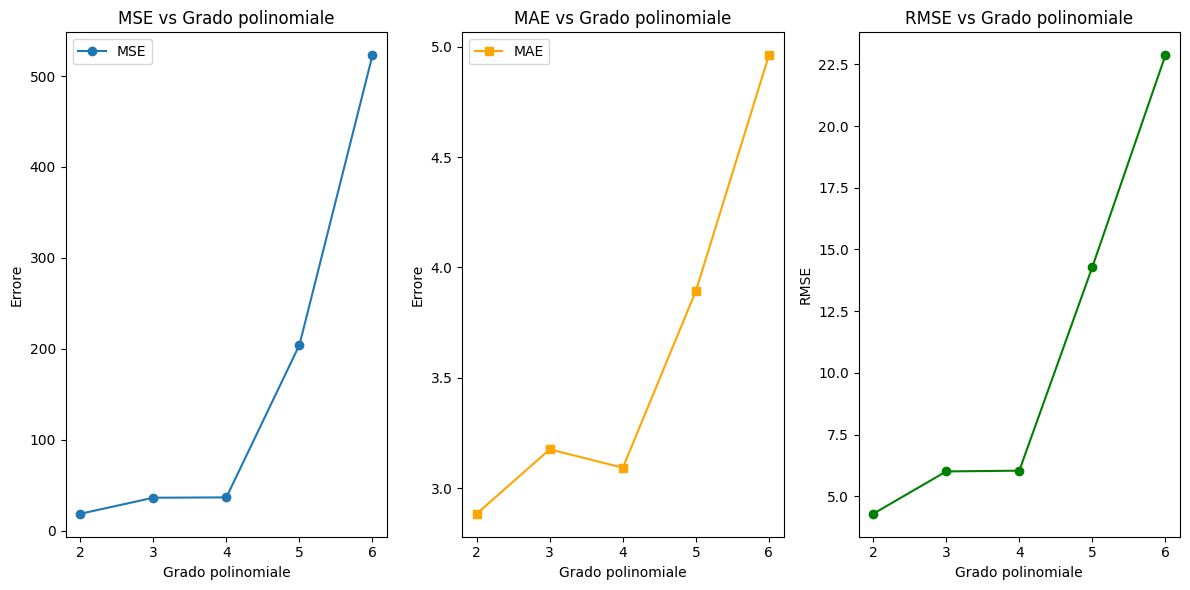

In [ ]:
results_df = pd.DataFrame(results)
display(results_df)

plt.figure(figsize=(12, 6))
# MSE
plt.subplot(1, 3, 1)
plt.plot(degrees, [r['mse'] for r in results], 'o-', label='MSE')
plt.xlabel('Grado polinomiale')
plt.ylabel('Errore')
plt.legend()
plt.title('MSE vs Grado polinomiale')
plt.xticks(list(degrees))

# MAE
plt.subplot(1, 3, 2)
plt.plot(degrees, [r['mae'] for r in results], 's-', label='MAE', color='orange')
plt.xlabel('Grado polinomiale')
plt.ylabel('Errore')
plt.legend()
plt.title('MAE vs Grado polinomiale')
plt.xticks(list(degrees))

# RMSE
plt.subplot(1, 3, 3)
plt.plot(degrees, [r['rmse'] for r in results], 'o-', color='green')
plt.xlabel('Grado polinomiale')
plt.ylabel('RMSE')
plt.title('RMSE vs Grado polinomiale')
plt.xticks(list(degrees))

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
# RANGE LIMITATO PER VISUALIZZARE MEGLIO
limited_degrees = range(2, 7)

# MSE 
plt.subplot(1, 3, 1)
plt.plot(limited_degrees, [results[i-2]['mse'] for i in limited_degrees], 'o-', label='MSE')
plt.xlabel('Grado polinomiale')
plt.ylabel('Errore')
plt.legend()
plt.title('MSE vs Grado polinomiale')
plt.xticks(list(limited_degrees))

# MAE
plt.subplot(1, 3, 2)
plt.plot(limited_degrees, [results[i-2]['mae'] for i in limited_degrees], 's-', label='MAE', color='orange')
plt.xlabel('Grado polinomiale')
plt.ylabel('Errore')
plt.legend()
plt.title('MAE vs Grado polinomiale')
plt.xticks(list(limited_degrees))

# RMSE
plt.subplot(1, 3, 3)
plt.plot(limited_degrees, [results[i-2]['rmse'] for i in limited_degrees], 'o-', color='green')
plt.xlabel('Grado polinomiale')
plt.ylabel('RMSE')
plt.title('RMSE vs Grado polinomiale')
plt.xticks(list(limited_degrees))

plt.tight_layout()
plt.show()

### Selezione del miglior modello in base a rmse

Il modello migliore ha grado 2 con RMSE = 4.2935


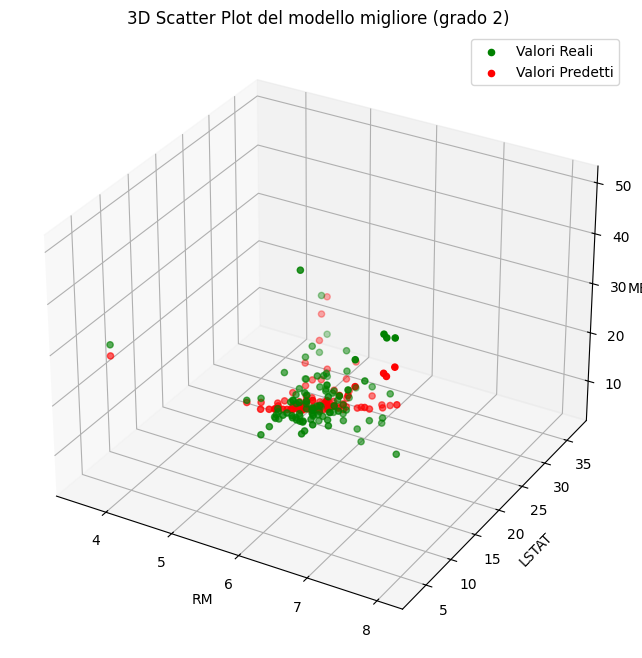

In [27]:
best_idx = min(range(len(results)), key=lambda i: results[i]['rmse'])
best_degree = results[best_idx]['Grado']
best_pred = predictions[best_idx]

print(f"Il modello migliore ha grado {best_degree} con RMSE = {results[best_idx]['rmse']:.4f}")

# Visualizza il modello in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['RM'], X_test['LSTAT'], y_test, color='g', label='Valori Reali')
ax.scatter(X_test['RM'], X_test['LSTAT'], best_pred, color='r', label='Valori Predetti')
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')
ax.set_title(f'3D Scatter Plot del modello migliore (grado {best_degree})')
plt.legend()
plt.show()

## Extra

##### Grafici relazione tra RM, LSTAT e MEDV

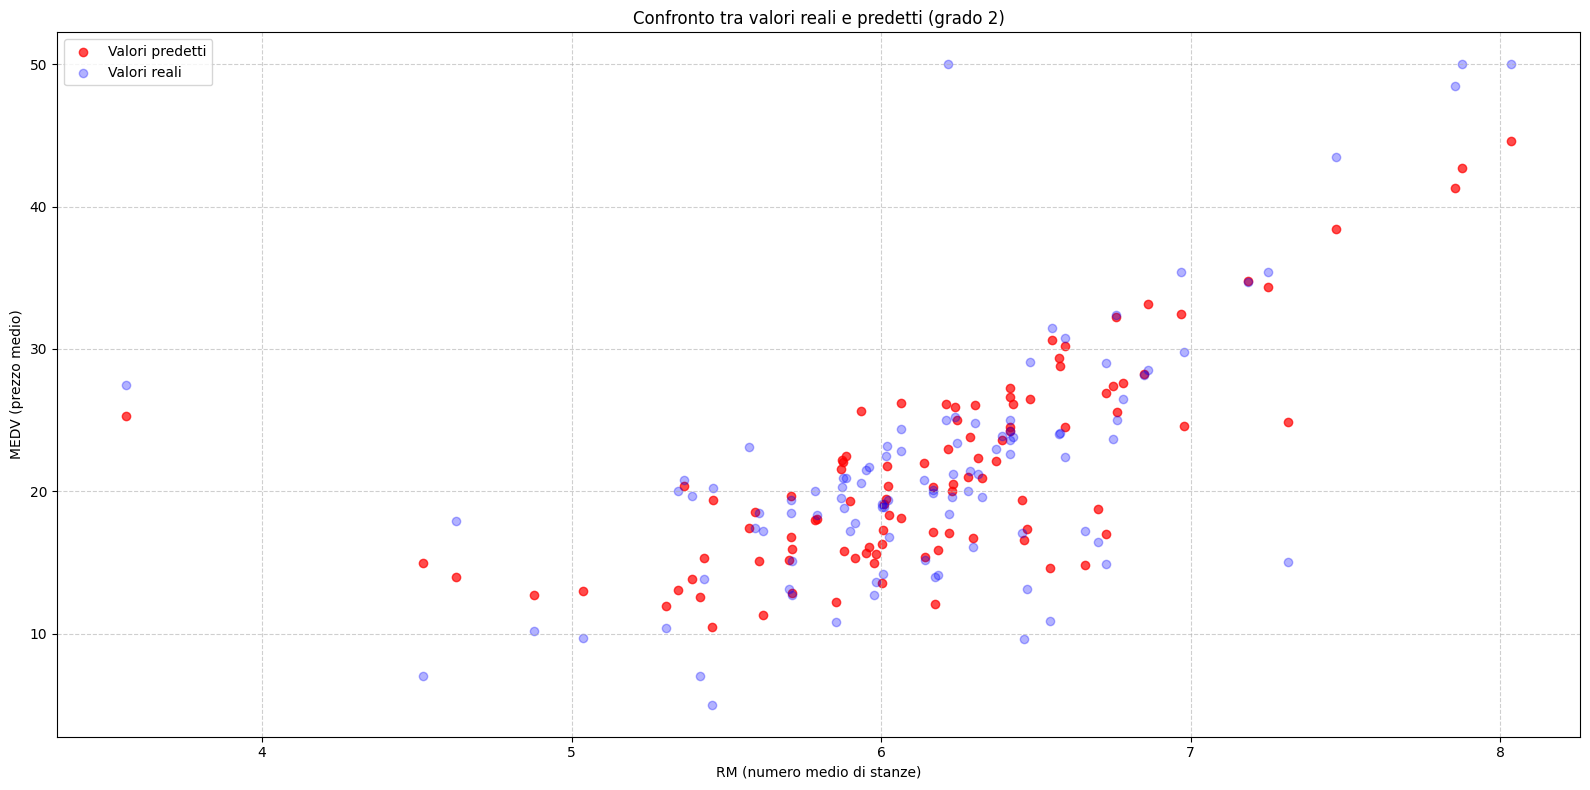

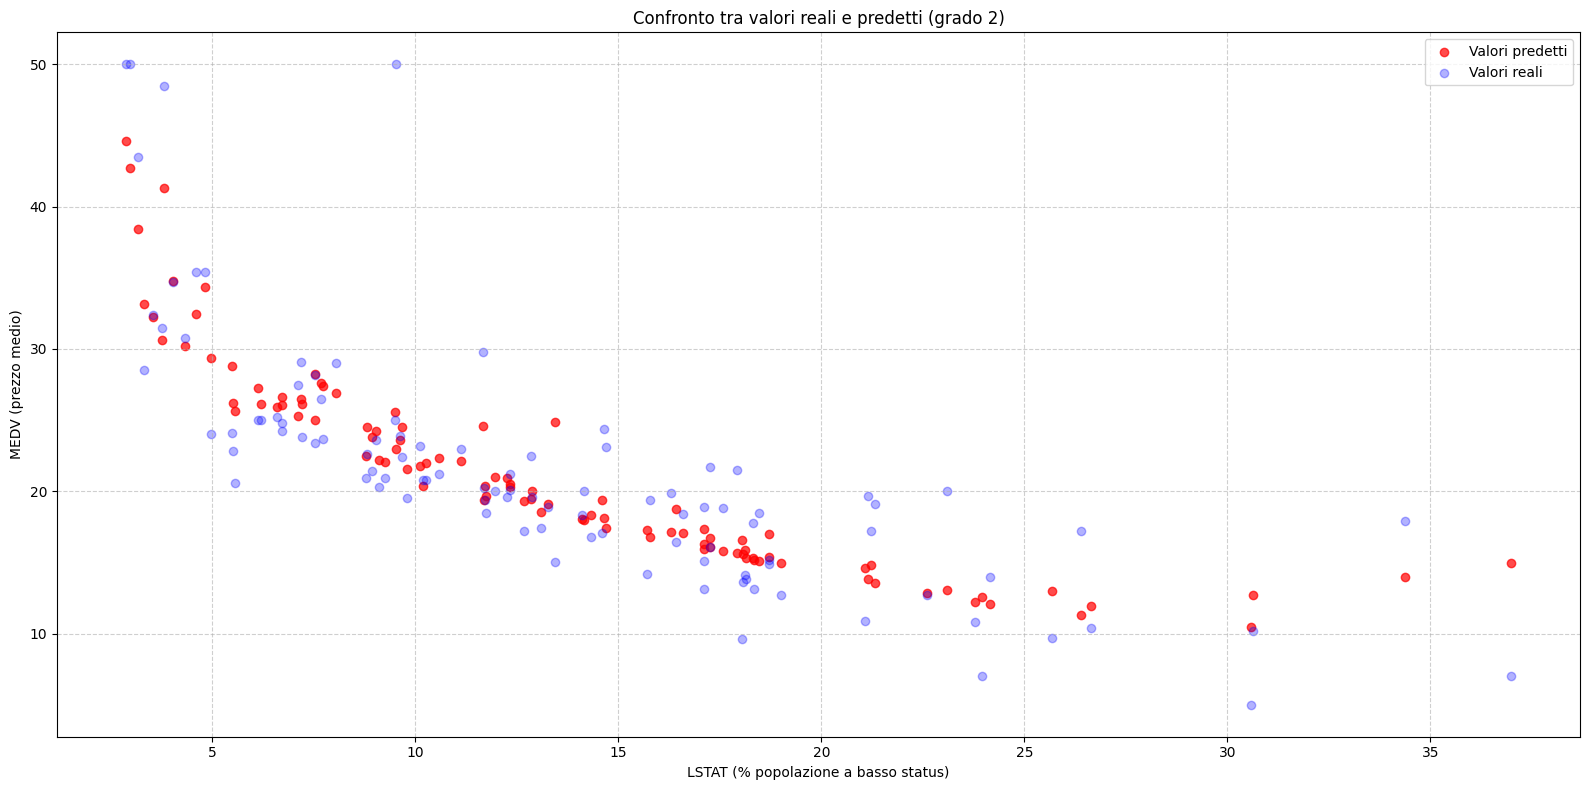

In [28]:
plt.figure(figsize=(16, 8))

# Grafico RM vs MEDV (valori predetti)
plt.scatter(X_test['RM'], best_pred, color='r', alpha=0.7, label='Valori predetti')
plt.scatter(X_test['RM'], y_test, color='b', alpha=0.3, label='Valori reali')
plt.xlabel('RM (numero medio di stanze)')
plt.ylabel('MEDV (prezzo medio)')
plt.title(f'Confronto tra valori reali e predetti (grado {best_degree})')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(16, 8))

# Grafico LSTAT vs MEDV (valori predetti)
plt.scatter(X_test['LSTAT'], best_pred, color='r', alpha=0.7, label='Valori predetti')
plt.scatter(X_test['LSTAT'], y_test, color='b', alpha=0.3, label='Valori reali')
plt.xlabel('LSTAT (% popolazione a basso status)')
plt.ylabel('MEDV (prezzo medio)')
plt.title(f'Confronto tra valori reali e predetti (grado {best_degree})')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

##### Calcolo residui (Reali - Predetti)

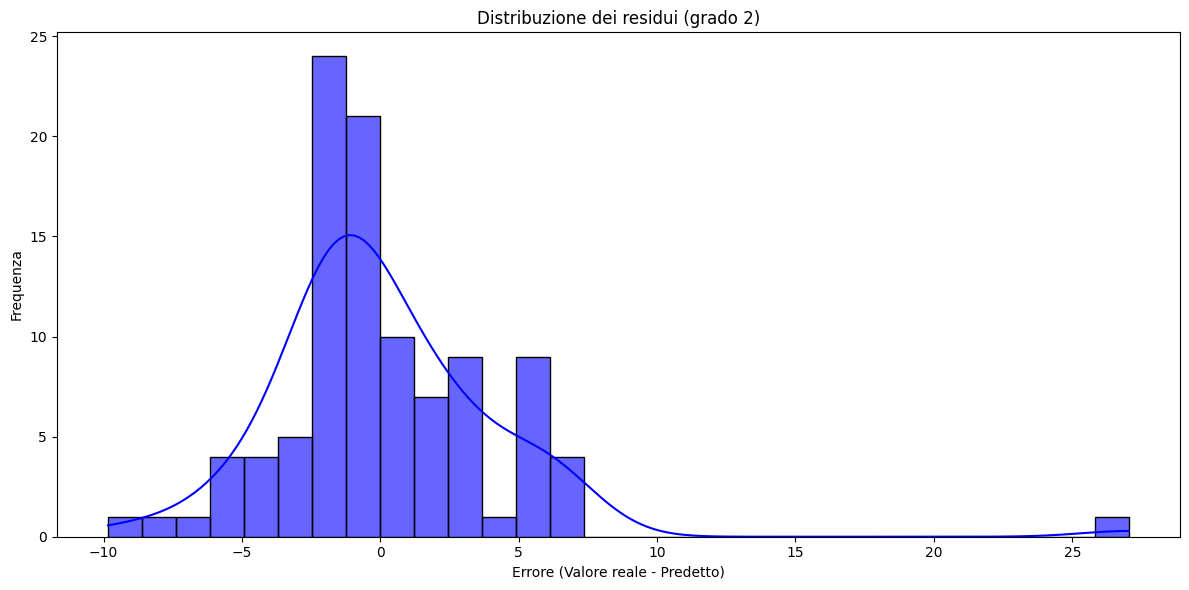

In [29]:
best_residuals = y_test - best_pred

plt.figure(figsize=(12, 6))
sns.histplot(best_residuals, kde=True, bins=30, color='blue', alpha=0.6)
plt.title(f"Distribuzione dei residui (grado {best_degree})")
plt.xlabel("Errore (Valore reale - Predetto)")
plt.ylabel("Frequenza")
plt.tight_layout()

plt.show()


Risultato delle predizioni (prezzi medi delle case):


,RM,LSTAT,MEDV_predetto
0,5.0,5.0,23.715879
1,6.0,10.0,21.814410
2,7.0,15.0,21.514182
3,8.0,20.0,22.815196
4,5.5,30.0,10.009768
5,6.5,3.0,30.871090


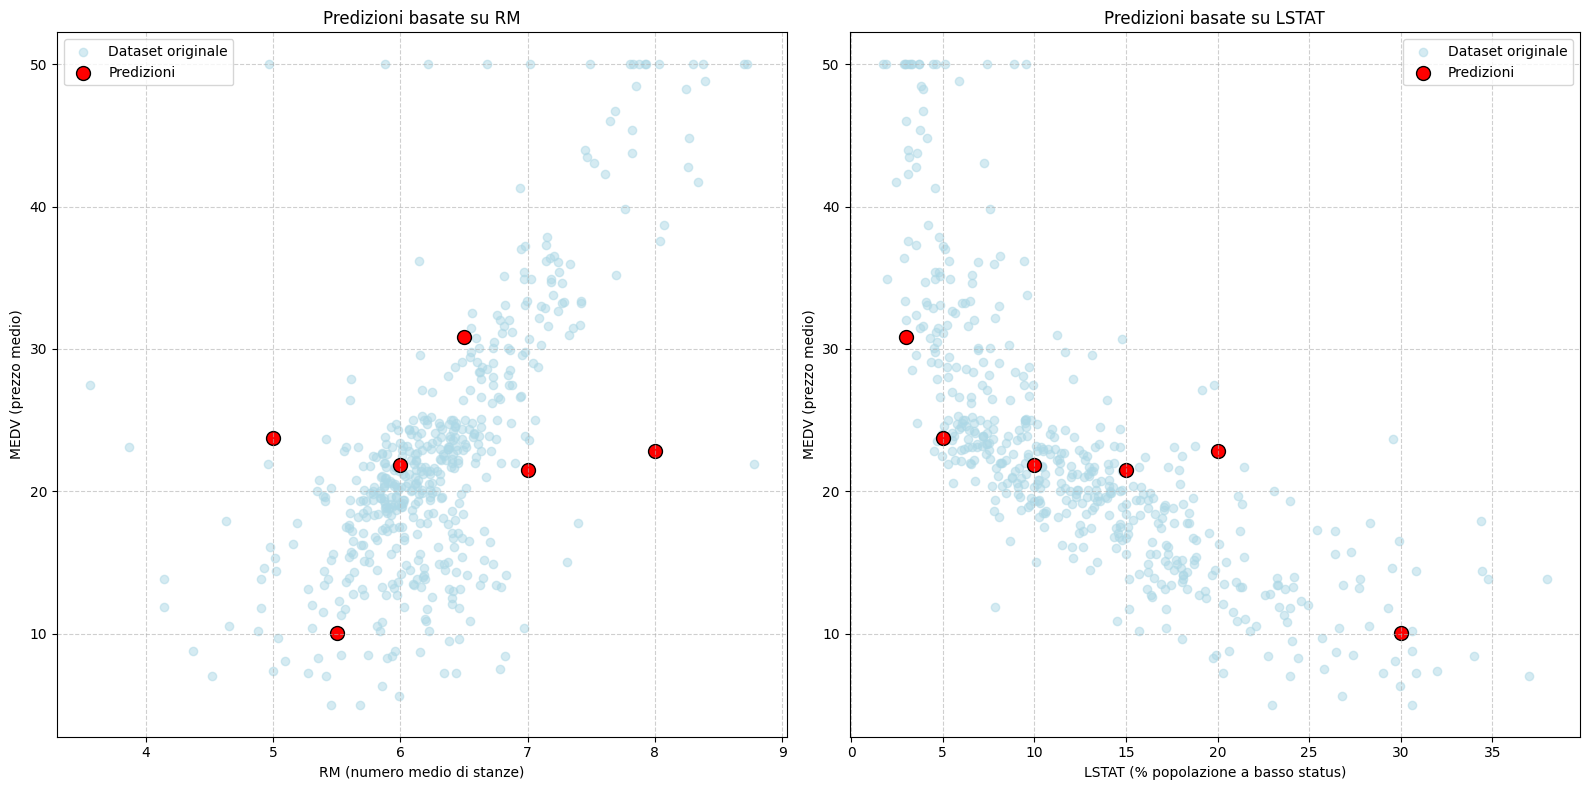

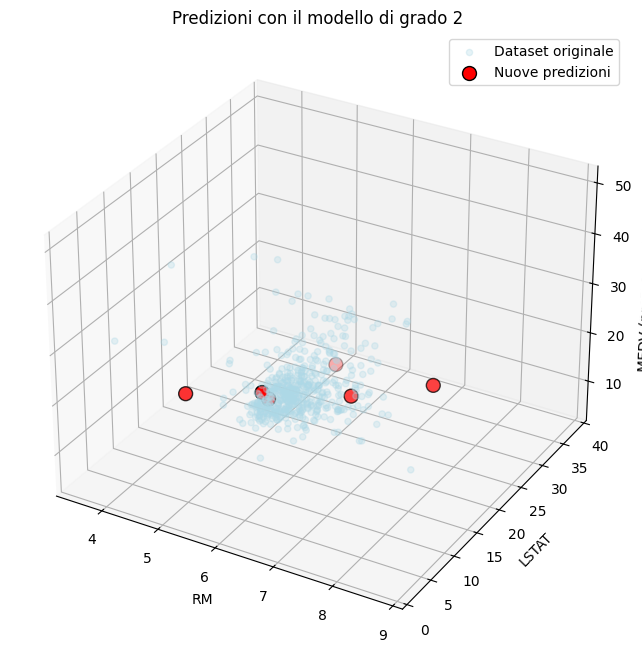

In [30]:
nuovi_dati = pd.DataFrame({
    'RM': [
        5.0,    # Casa con numero di stanze medio-basso
        6.0,    # Casa con numero di stanze medio
        7.0,    # Casa con numero di stanze medio-alto
        8.0,    # Casa con molte stanze
        5.5,    # Caso intermedio
        6.5     # Caso intermedio
    ],
    'LSTAT': [
        5.0,    # Area con bassa percentuale di popolazione a basso status
        10.0,   # Area con media-bassa percentuale
        15.0,   # Area con media percentuale
        20.0,   # Area con media-alta percentuale
        30.0,   # Area con alta percentuale
        3.0     # Area con percentuale molto bassa
    ]
})

# Usa il modello migliore che è già stato calcolato
# Ricreiamo il modello con il grado migliore
modello_migliore = make_pipeline(
    PolynomialFeatures(degree=best_degree),  # Usa il grado migliore già trovato
    LinearRegression()
)

# Addestra il modello su tutto il dataset
modello_migliore.fit(X, y)  # Usa l'intero dataset per maggiore precisione

# Esegui le predizioni
predizioni = modello_migliore.predict(nuovi_dati)

# Mostra i risultati
risultati = nuovi_dati.copy()
risultati['MEDV_predetto'] = predizioni
print("\nRisultato delle predizioni (prezzi medi delle case):")
display(risultati)



# Visualizza le predizioni nel contesto dei dati originali
plt.figure(figsize=(16, 8))

# Subplot per RM
plt.subplot(1, 2, 1)
plt.scatter(X['RM'], y, color='lightblue', alpha=0.5, label='Dataset originale')
plt.scatter(nuovi_dati['RM'], predizioni, color='red', s=100, edgecolor='k', label='Predizioni')
plt.xlabel('RM (numero medio di stanze)')
plt.ylabel('MEDV (prezzo medio)')
plt.title('Predizioni basate su RM')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Subplot per LSTAT
plt.subplot(1, 2, 2)
plt.scatter(X['LSTAT'], y, color='lightblue', alpha=0.5, label='Dataset originale')
plt.scatter(nuovi_dati['LSTAT'], predizioni, color='red', s=100, edgecolor='k', label='Predizioni')
plt.xlabel('LSTAT (% popolazione a basso status)')
plt.ylabel('MEDV (prezzo medio)')
plt.title('Predizioni basate su LSTAT')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()


# Visualizzazione 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dati originali in azzurro semitrasparente
ax.scatter(X['RM'], X['LSTAT'], y, color='lightblue', alpha=0.3, label='Dataset originale')

# Nuove predizioni in rosso
ax.scatter(nuovi_dati['RM'], nuovi_dati['LSTAT'], predizioni, 
           color='red', s=100, marker='o', edgecolor='k', label='Nuove predizioni')

ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV (prezzo predetto)')
ax.set_title('Predizioni con il modello di grado ' + str(best_degree))
plt.legend()
plt.show()